**Importing Libraries**

In [42]:
import calendar
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


import warnings
warnings.filterwarnings('ignore')

plt.style.use(style='fivethirtyeight')
pd.options.display.float_format = '{:,.0f}'.format

**Loading Dataset**

In [2]:
data=pd.read_csv('/kaggle/input/walmart-sales/Walmart_Sales.csv')

data.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,"1,643,691",0,42,3,211,8
1,1,12-02-2010,"1,641,957",1,39,3,211,8
2,1,19-02-2010,"1,611,968",0,40,3,211,8


In [3]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,"6,435","6,435","6,435","6,435","6,435","6,435","6,435"
mean,23,"1,046,965",0,61,3,172,8
std,13,"564,367",0,18,0,39,2
min,1,"209,986",0,-2,2,126,4
25%,12,"553,350",0,47,3,132,7
50%,23,"960,746",0,63,3,183,8
75%,34,"1,420,159",0,75,4,213,9
max,45,"3,818,686",1,100,4,227,14


In [4]:
data.columns = data.columns.str.lower()

In [5]:
data.isnull().sum()

store           0
date            0
weekly_sales    0
holiday_flag    0
temperature     0
fuel_price      0
cpi             0
unemployment    0
dtype: int64

In [6]:
data.duplicated().sum()

0

# Correcting the date format

In [7]:
data['date'] = pd.to_datetime(data['date'],format = "%d-%m-%Y")


In [9]:
def Sesson_getter(quarter):
    if quarter ==1:
        return 'Winter'
    elif quarter == 2:
        return 'Spring'
    elif quarter == 3:
        return 'Summer'
    else:
        return 'Fall'

In [41]:

data['year'] = data['date'].dt.year # to add a year column
data['quarter'] = data['date'].dt.quarter # to add a quarter column (q1, q2, q3 and q3)
data['season'] = data['quarter'].apply(Sesson_getter) # applied the previously defined function to get the season names
data['month'] = data['date'].dt.month # to add a month coumn
data['month_name'] = data['date'].dt.month_name() # to add a month_name column
data['week'] = data['date'].dt.isocalendar().week # to add a week column
data['day_of_week'] = data['date'].dt.day_name() # to add a day_name column

data.head(3)

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,quarter,season,month,month_name,week,day_of_week
0,1,2010-02-05,"1,643,691",0,42,3,211,8,2010,1,Winter,2,February,5,Friday
1,1,2010-02-12,"1,641,957",1,39,3,211,8,2010,1,Winter,2,February,6,Friday
2,1,2010-02-19,"1,611,968",0,40,3,211,8,2010,1,Winter,2,February,7,Friday


In [11]:
data[['weekly_sales','temperature','fuel_price', 'cpi', 'unemployment']].describe()

,weekly_sales,temperature,fuel_price,cpi,unemployment
count,"6,435","6,435","6,435","6,435","6,435"
mean,"1,046,965",61,3,172,8
std,"564,367",18,0,39,2
min,"209,986",-2,2,126,4
25%,"553,350",47,3,132,7
50%,"960,746",63,3,183,8
75%,"1,420,159",75,4,213,9
max,"3,818,686",100,4,227,14


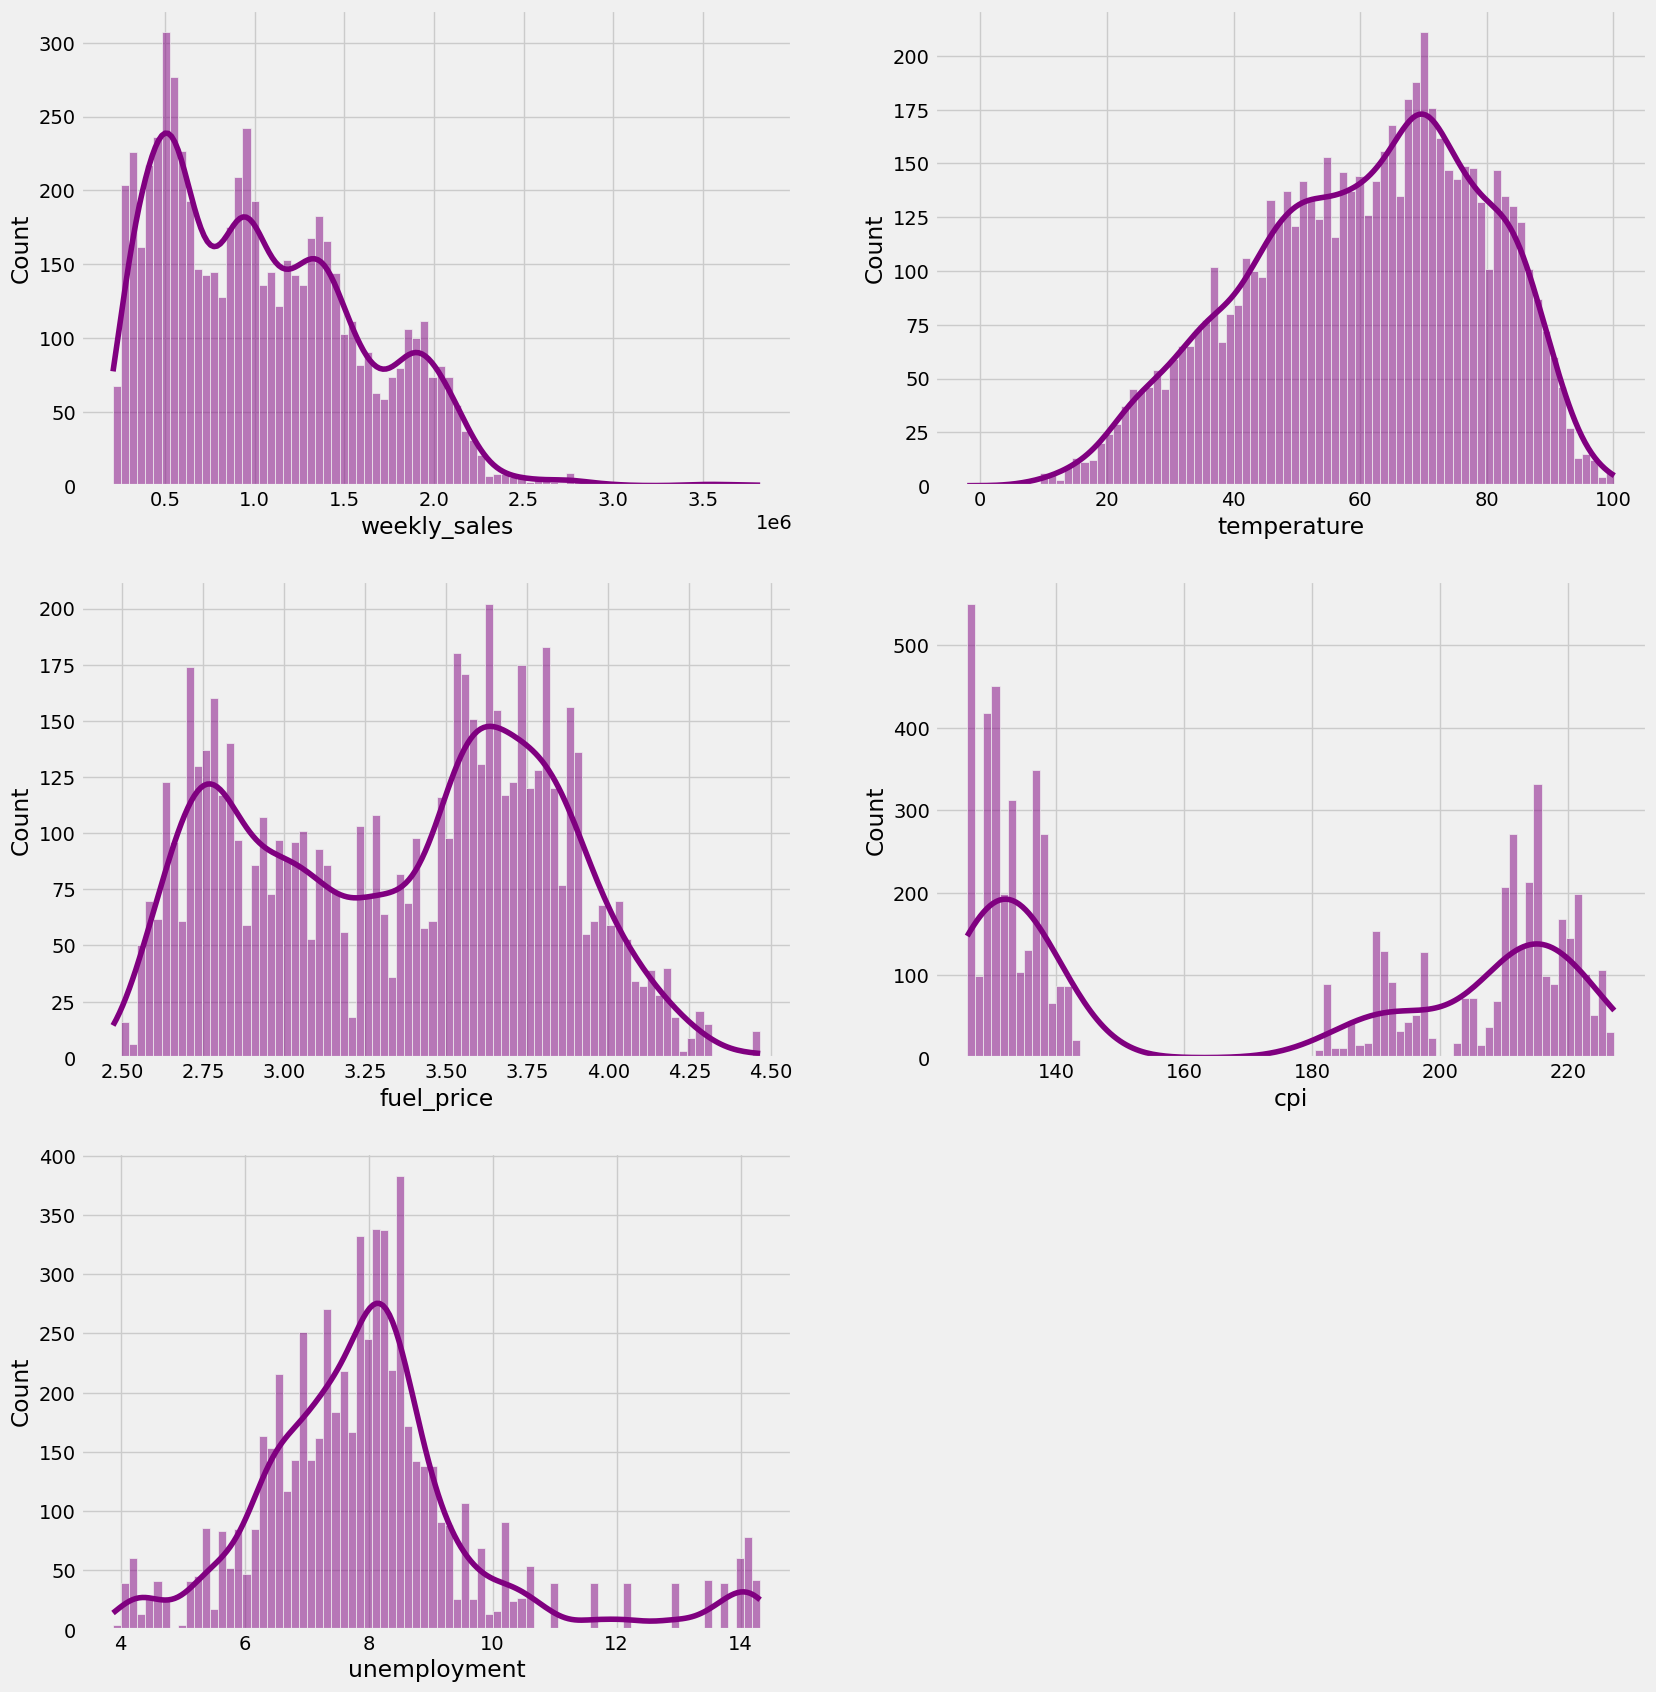

In [12]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("fivethirtyeight")

columns = ['weekly_sales','temperature','fuel_price', 'cpi', 'unemployment']

plt.figure(figsize = (18, 20))
for i, col in enumerate(columns):
    plt.subplot(3, 2, i+1)
    sns.histplot(data = data, x = col, kde = True, bins = round(np.sqrt(len(data))), color = 'purple') # Applied Square Root Rule for bins count
plt.show()

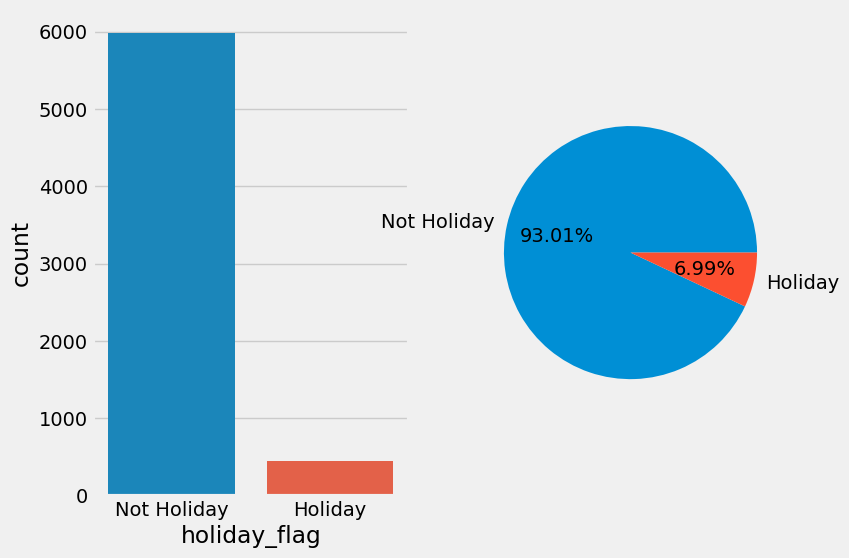

In [48]:
data2=data.copy()
data2['holiday_flag']=data2['holiday_flag'].map({0:'Not Holiday',1:'Holiday'})
fig, ax = plt.subplots(1, 2, figsize = (8, 6))
sns.countplot(data = data2, x = 'holiday_flag', ax=ax[0])
ax[1].pie(data2['holiday_flag'].value_counts().values,
         labels=data2['holiday_flag'].value_counts().index, autopct ='%1.2f%%')
plt.show()

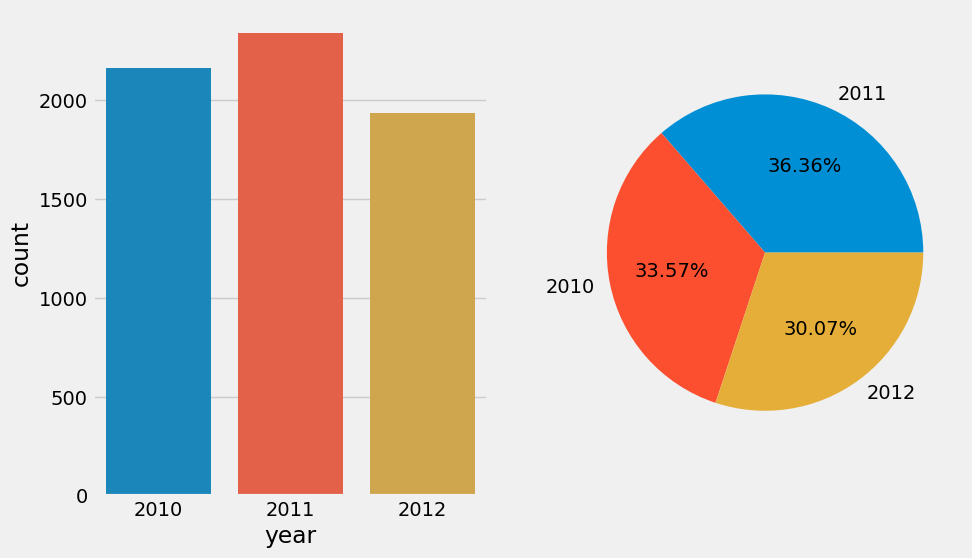

In [14]:
year_counts = data['year'].value_counts()
fig, ax = plt.subplots(1, 2, figsize = (10, 6))
sns.countplot(data = data, x = 'year', ax=ax[0])

ax[1].pie(data['year'].value_counts().values,
         labels = data['year'].value_counts().index, 
         autopct = '%1.2f%%')
plt.show()

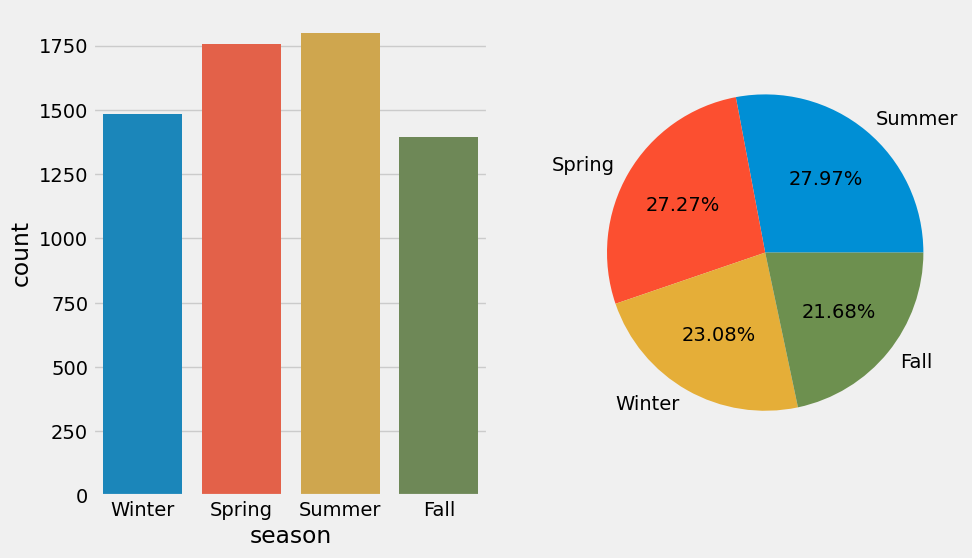

In [15]:
season_counts = data['season'].value_counts()
fig, ax = plt.subplots(1, 2, figsize = (10, 6))
sns.countplot(data = data, x = 'season', ax=ax[0])

ax[1].pie(data['season'].value_counts().values,
         labels = data['season'].value_counts().index, 
         autopct = '%1.2f%%')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'February'),
  Text(1, 0, 'March'),
  Text(2, 0, 'April'),
  Text(3, 0, 'May'),
  Text(4, 0, 'June'),
  Text(5, 0, 'July'),
  Text(6, 0, 'August'),
  Text(7, 0, 'September'),
  Text(8, 0, 'October'),
  Text(9, 0, 'November'),
  Text(10, 0, 'December'),
  Text(11, 0, 'January')])

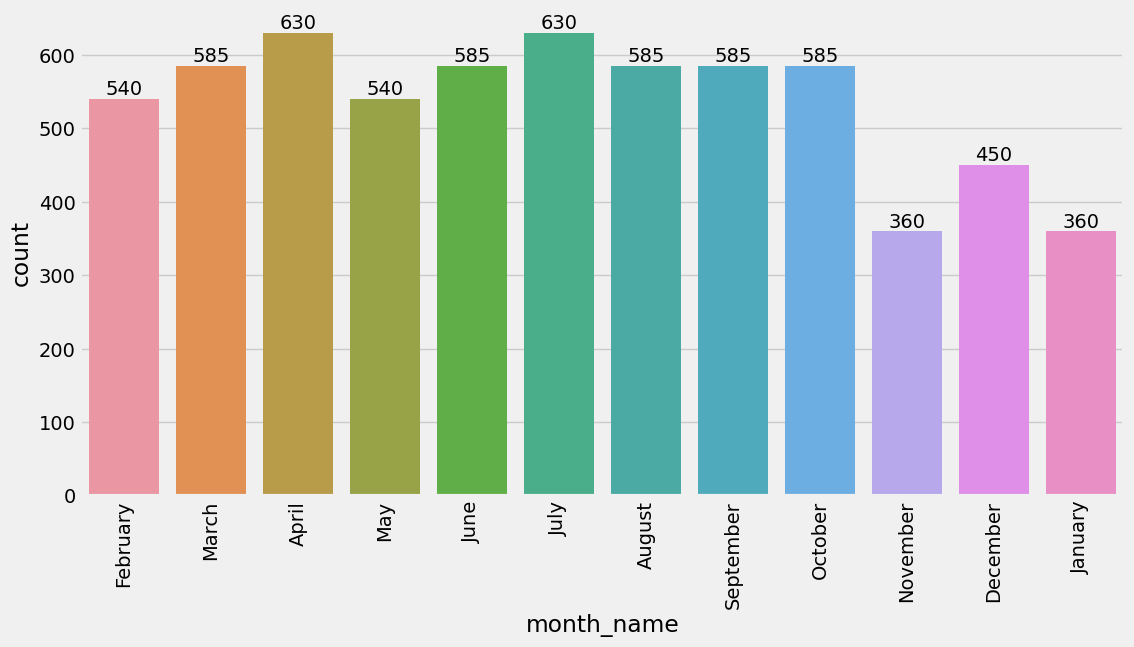

In [16]:
month_name_counts = data['month_name'].value_counts()
plt.figure(figsize = (12, 6))
ax=sns.countplot(data = data, x = 'month_name')
for bar in ax.containers:
    ax.bar_label(bar)
plt.xticks(rotation=90)

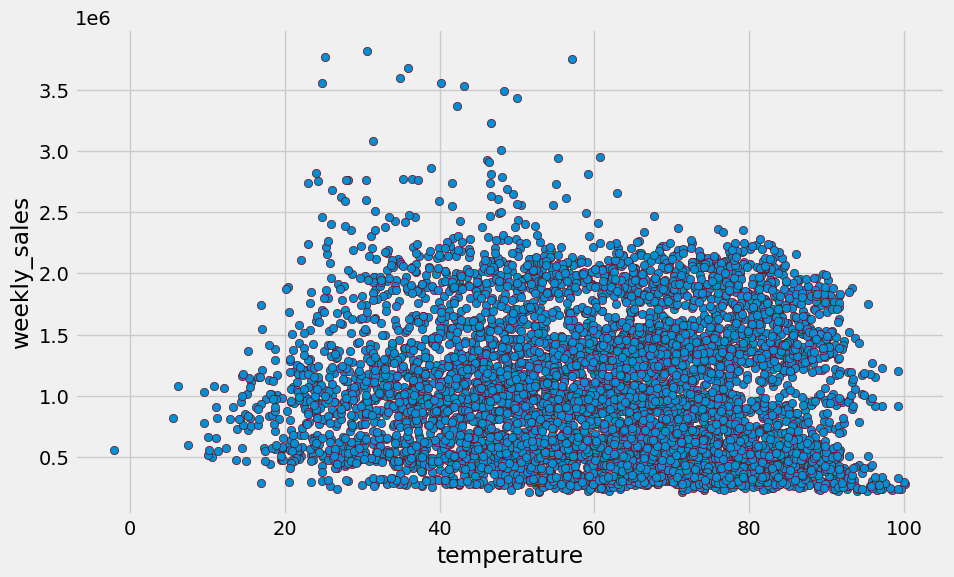

In [17]:
plt.figure(figsize = (10, 6))

sns.scatterplot(data = data,
           x = 'temperature',
           y = 'weekly_sales',
           edgecolor = 'maroon')
plt.show()

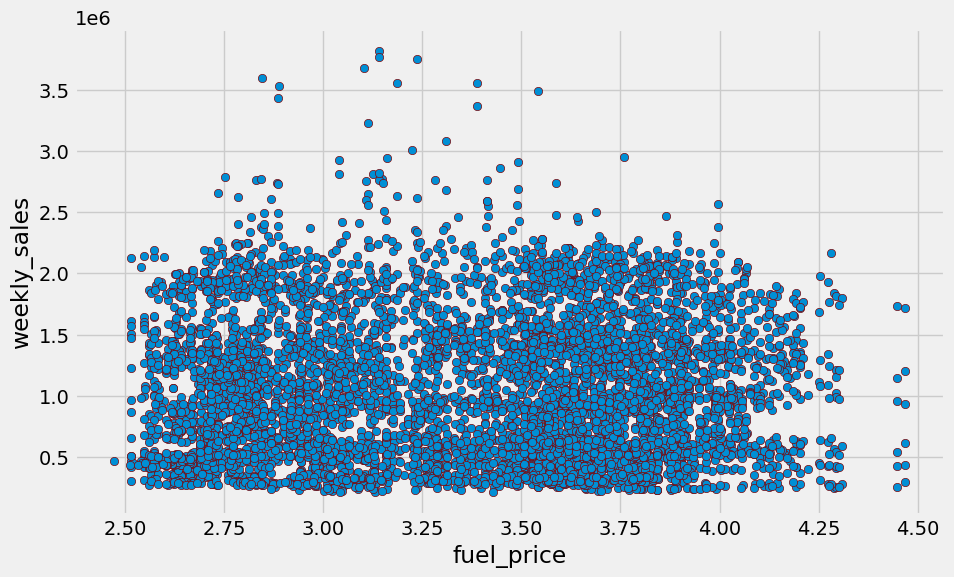

In [19]:
plt.figure(figsize = (10, 6))

sns.scatterplot(data = data,
           x = 'fuel_price',
           y = 'weekly_sales',
           edgecolor = 'maroon')
plt.show()

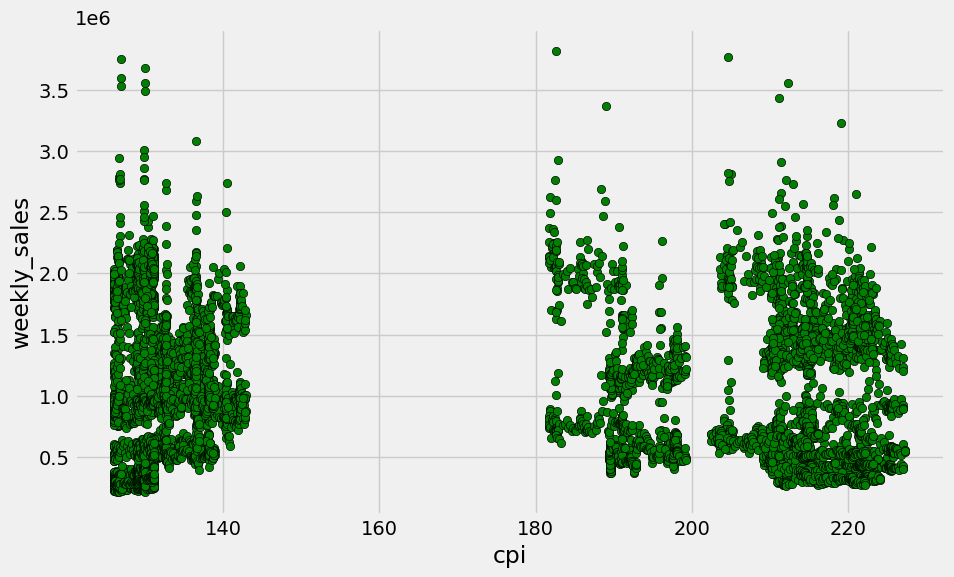

In [18]:
plt.figure(figsize = (10, 6))

sns.scatterplot(data = data,
           x = 'cpi',
           y = 'weekly_sales',
           color = 'green',
           edgecolor = 'black')
plt.show()

**average sales on holiday and regular days**

In [20]:
data.groupby('holiday_flag')['weekly_sales'].mean()

holiday_flag
0   1,041,256
1   1,122,888
Name: weekly_sales, dtype: float64

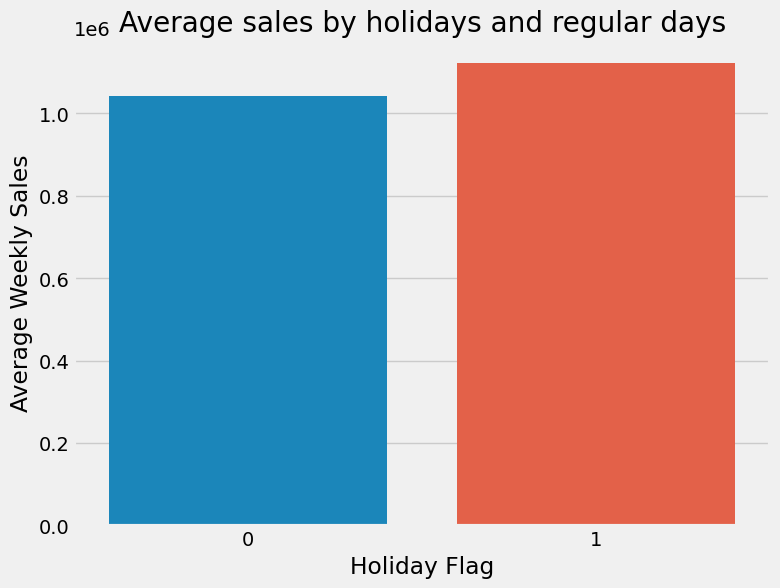

In [21]:
plt.figure(figsize = (8, 6))
sns.barplot(data = data,
           x = 'holiday_flag',
           y = 'weekly_sales',
           estimator = np.mean,
           ci = False)

plt.title('Average sales by holidays and regular days')
plt.xlabel('Holiday Flag')
plt.ylabel('Average Weekly Sales')
plt.show()

**Total sales on holiday and regular days**

In [22]:
data.groupby('holiday_flag')['weekly_sales'].sum()

holiday_flag
0   6,231,919,436
1     505,299,552
Name: weekly_sales, dtype: float64

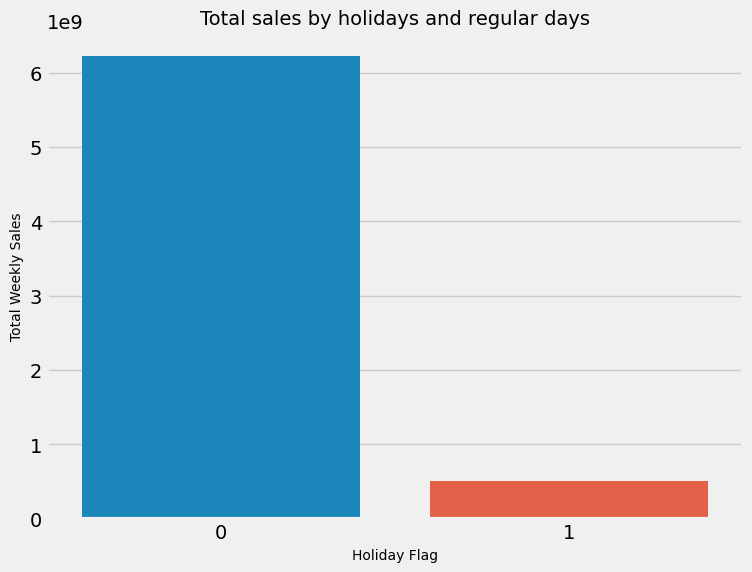

In [23]:
plt.figure(figsize = (8, 6))
sns.barplot(data = data,
           x = 'holiday_flag',
           y = 'weekly_sales',
           estimator = np.sum,
           ci = False)

plt.title('Total sales by holidays and regular days', size = 14)
plt.xlabel('Holiday Flag', size = 10)
plt.ylabel('Total Weekly Sales', size = 10)
plt.show()

**Which Branch is performing better?**

<Axes: xlabel='store'>

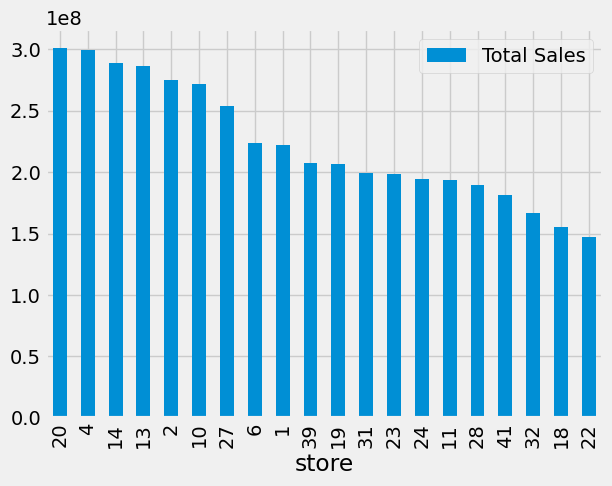

In [24]:
best_branch =  data.groupby('store')['weekly_sales'].sum().sort_values(ascending = False).to_frame('Total Sales').sort_values(by='Total Sales',ascending=False)
best_branch.head(20).plot(kind='bar')


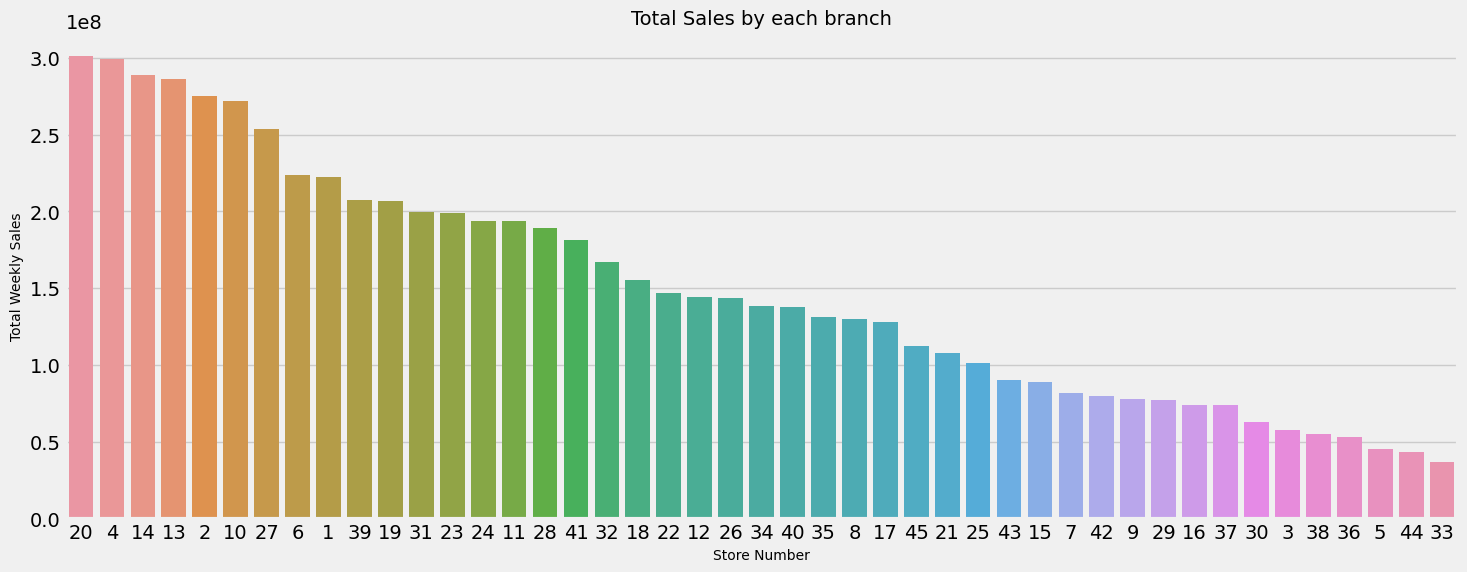

In [25]:
plt.figure(figsize = (16, 6))
sns.barplot(data = data,
           x = 'store',
           y = 'weekly_sales',
           order = best_branch.index,
           estimator = np.sum,
           ci = False)

plt.title('Total Sales by each branch', size = 14)
plt.xlabel('Store Number', size = 10)
plt.ylabel('Total Weekly Sales', size = 10)
plt.show()

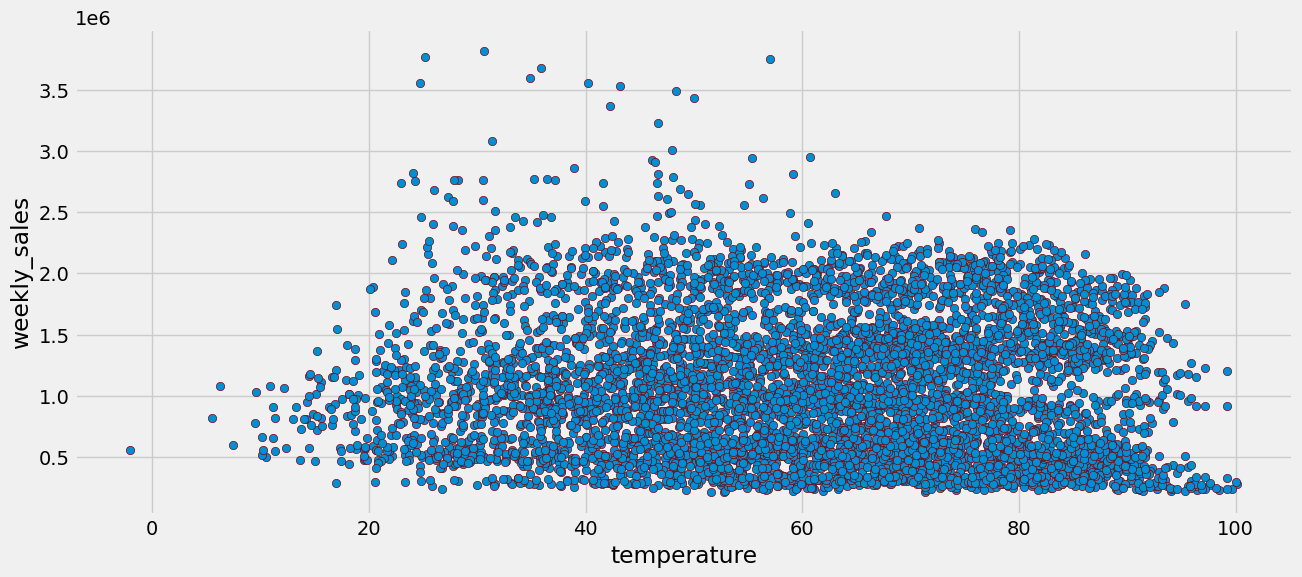

In [26]:
plt.figure(figsize = (14, 6))

sns.scatterplot(data = data,
           x = 'temperature',
           y = 'weekly_sales',
           edgecolor = 'maroon')
plt.show()

In [ ]:
data.dtypes

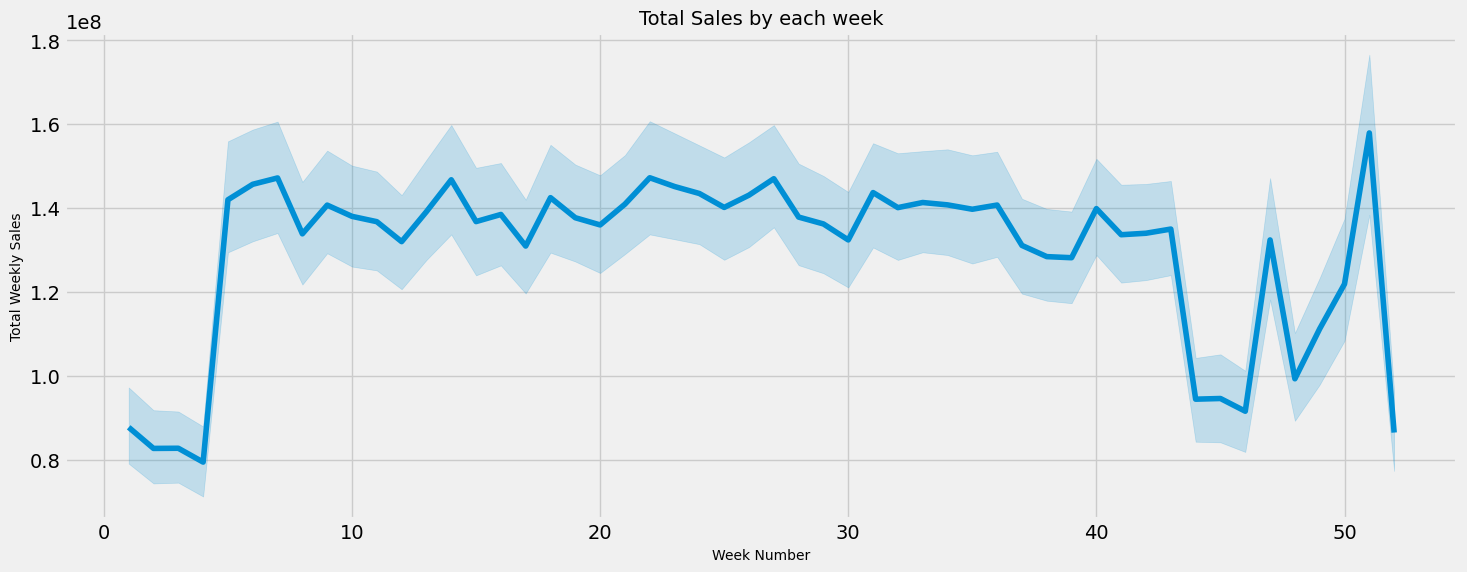

In [27]:
plt.figure(figsize = (16, 6))
sns.lineplot(data = data,
           x = 'week',
           y = 'weekly_sales',
           estimator = np.sum)

plt.title('Total Sales by each week', size = 14)
plt.xlabel('Week Number', size = 10)
plt.ylabel('Total Weekly Sales', size = 10)
plt.show()

In [28]:
pd.pivot_table(data = data,
              index = 'year',
              columns = 'season',
              values = 'weekly_sales',
              aggfunc = 'sum')

season,Fall,Spring,Summer,Winter
year,,,,
2010,"708,775,727","610,369,475","597,488,133","372,252,786"
2011,"681,501,740","597,948,054","639,358,470","529,391,743"
2012,"184,361,680","618,297,715","605,005,763","592,467,702"


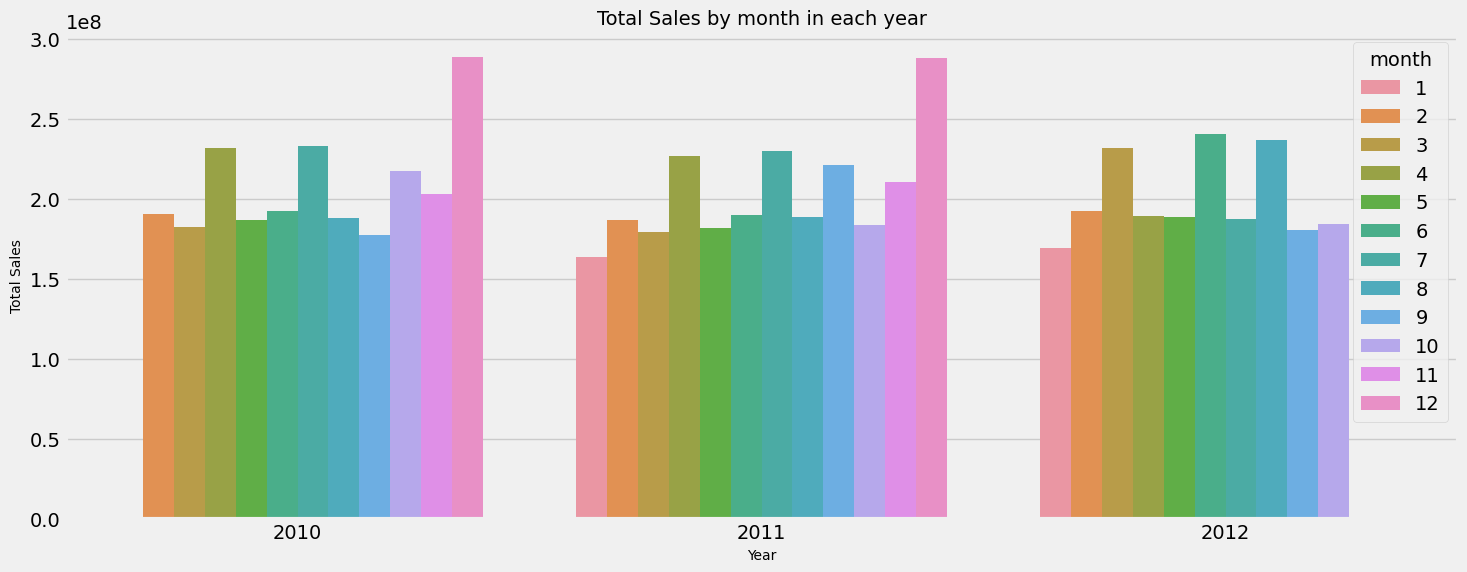

In [29]:
plt.figure(figsize = (16, 6))
sns.barplot(data = data,
           x = 'year',
           y = 'weekly_sales',
           hue = 'month',
           estimator = np.sum,
           ci = False)

plt.title('Total Sales by month in each year', size = 14)
plt.xlabel('Year', size = 10)
plt.ylabel('Total Sales', size = 10)
plt.show()

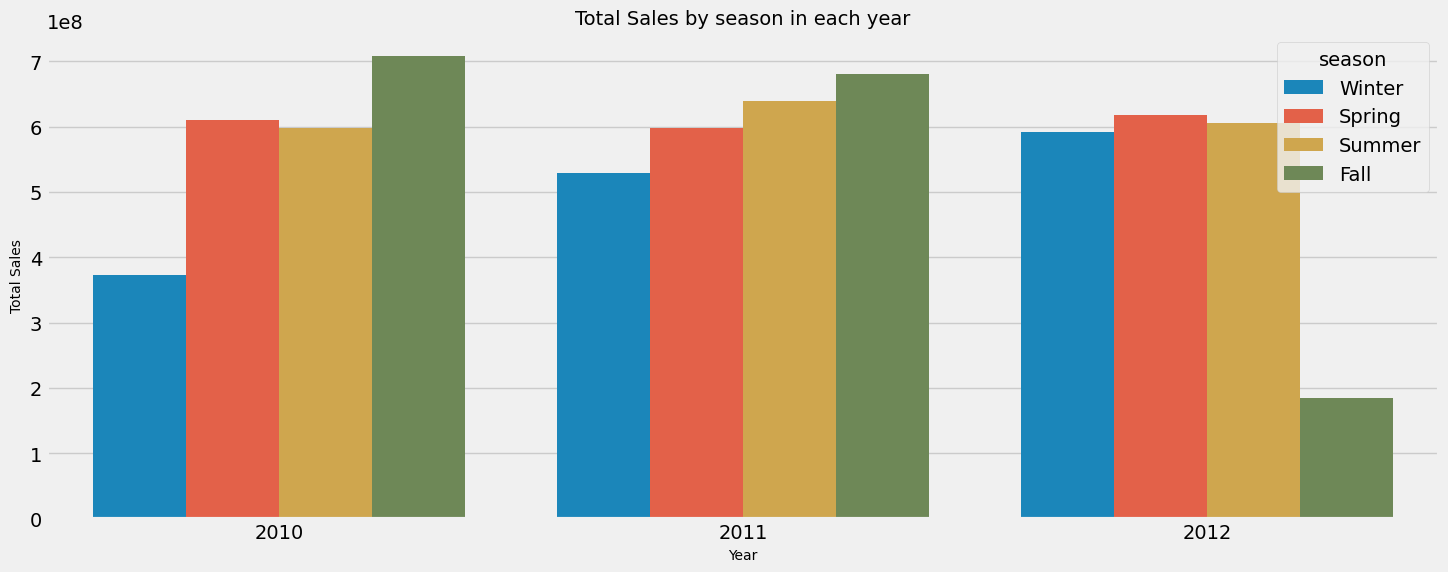

In [30]:
plt.figure(figsize = (16, 6))
sns.barplot(data = data,
           x = 'year',
           y = 'weekly_sales',
           hue = 'season',
           estimator = np.sum,
           ci = False)

plt.title('Total Sales by season in each year', size = 14)
plt.xlabel('Year', size = 10)
plt.ylabel('Total Sales', size = 10)
plt.show()

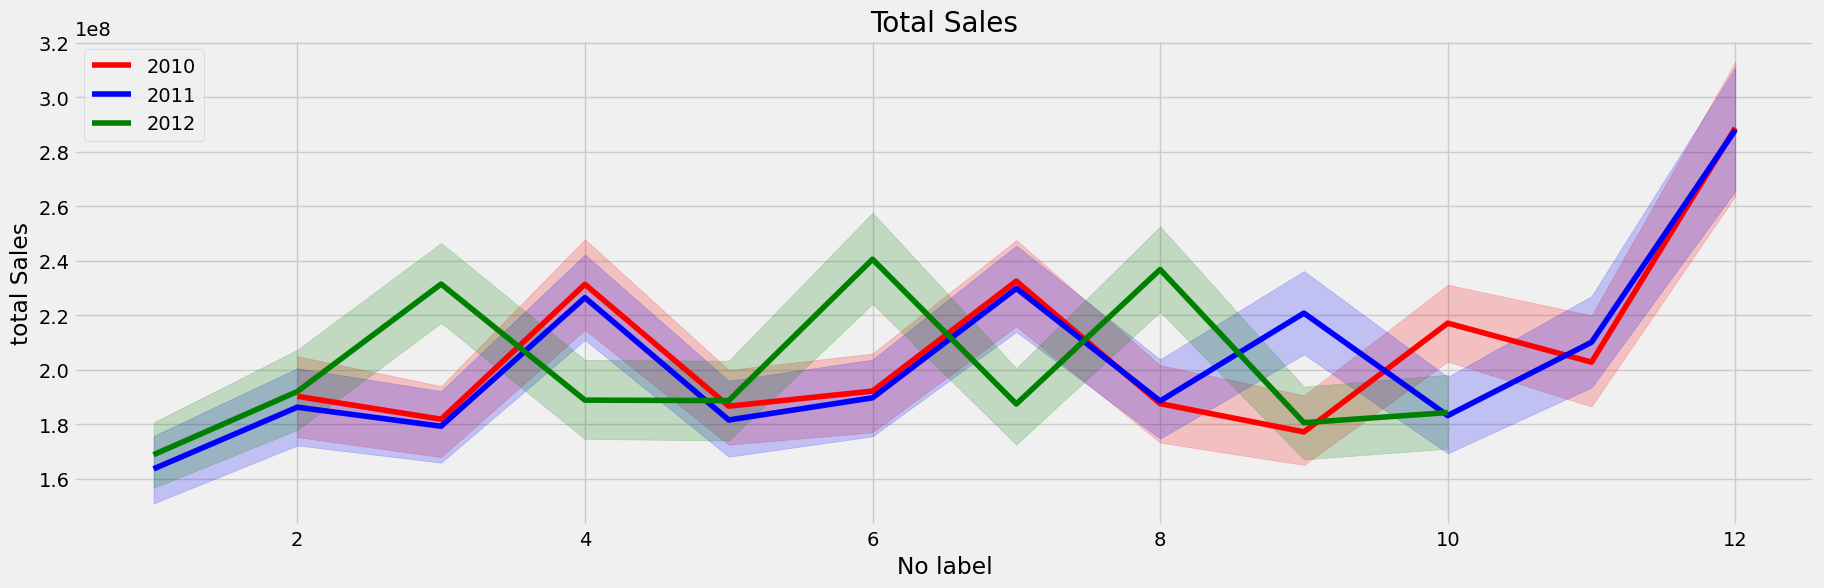

In [31]:
years = ['2010', '2011', '2012']
colors = ['red', 'blue', 'green']

plt.figure(figsize = (20, 6))
for i, year in enumerate(years):
    sns.lineplot(data = data[data['year']==int(year)], 
                x = 'month',
                y = 'weekly_sales',
                estimator = np.sum,
                color = colors[i],
                label = year)
plt.title('Total Sales')
plt.xlabel('No label')
plt.ylabel('total Sales')
plt.show()

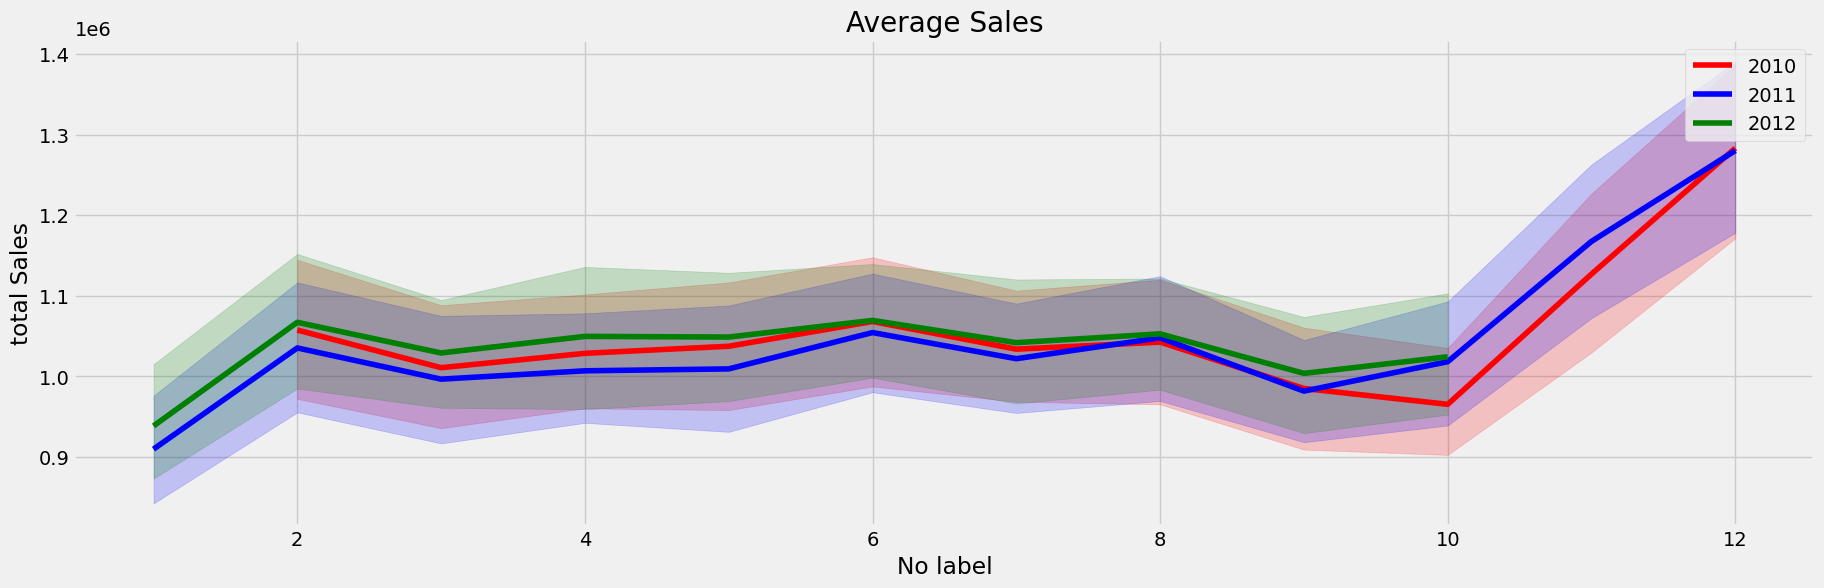

In [32]:
years = ['2010', '2011', '2012']
colors = ['red', 'blue', 'green']

plt.figure(figsize = (20, 6))
for i, year in enumerate(years):
    sns.lineplot(data = data[data['year']==int(year)], 
                x = 'month',
                y = 'weekly_sales',
                estimator = np.mean,
                color = colors[i],
                label = year)
plt.title('Average Sales')
plt.xlabel('No label')
plt.ylabel('total Sales')
plt.show()

**find the best store for each year**

In [33]:
df=data.groupby(by=['year','store'])['weekly_sales'].agg('sum').to_frame('Total Sales').reset_index()
df['rank year wise']=df.groupby(by=['year'])['Total Sales'].rank(method='dense',ascending=False)
df[df['rank year wise']==1].reset_index()[['year','store','Total Sales']]

,year,store,Total Sales
0,2010,14,"105,462,242"
1,2011,4,"111,092,293"
2,2012,4,"92,771,189"


**year wise each store contribution**

,year,store,year wise total all store,year wise contribution(%)
1859,2010,14,"2,288,886,120",5
2717,2010,20,"2,288,886,120",4
429,2010,4,"2,288,886,120",4
143,2010,2,"2,288,886,120",4
1716,2010,13,"2,288,886,120",4


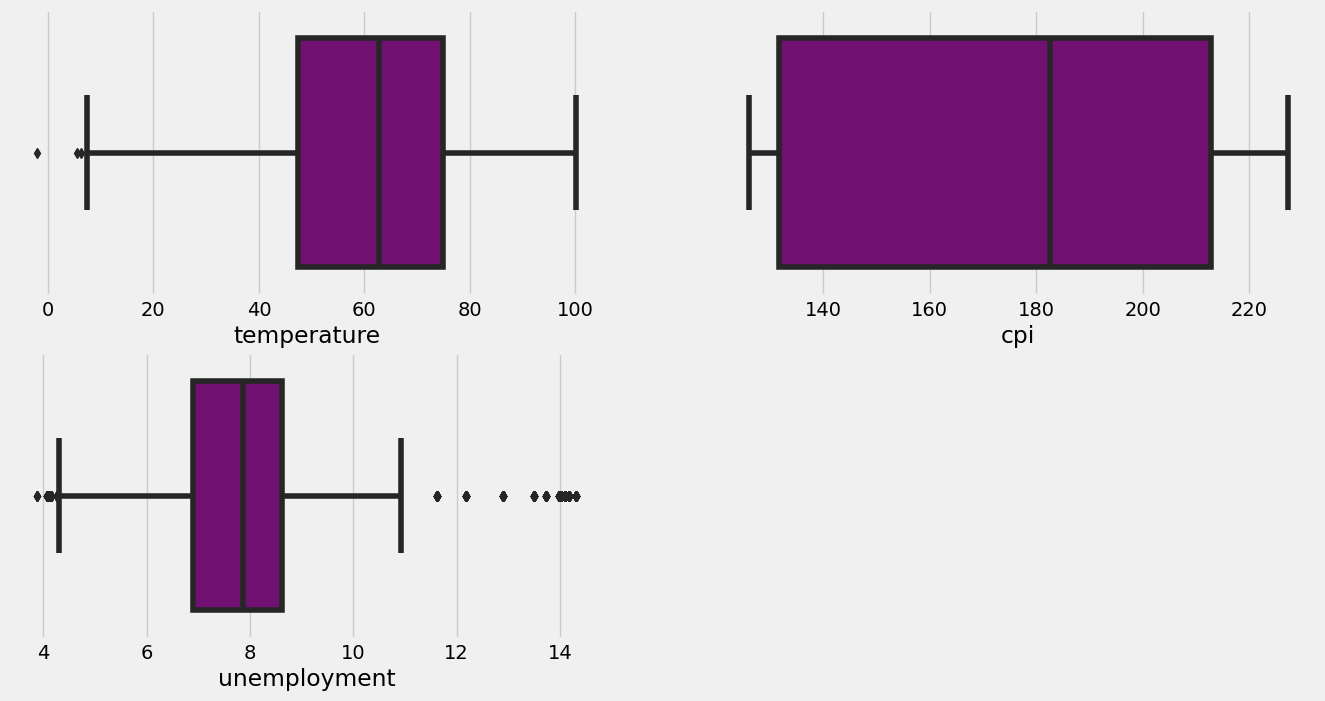

In [39]:
columns = ['temperature', 'cpi', 'unemployment']



plt.figure(figsize = (15,12))
for i, col in enumerate(columns):
    plt.subplot(3, 2, i+1)
    sns.boxplot(data = data, x = col,color = 'purple') 
plt.show()

**END**